# Predicting_Customer_Internet_Sales

### Loading Libraries

In [81]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os
import statsmodels.api as sm
import scipy.stats as ss
import itertools

#### ETL from Google Adwords/ Facebook Ads  

In [58]:
df = pd.read_csv('SocialNetworkAds.csv')

## Data Wrangling

In [59]:
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Examine - User DataSet

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [62]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#### Histogram of Age

<AxesSubplot:>

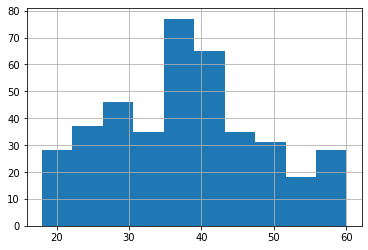

In [90]:
%matplotlib inline
df.Age.hist()

#### Histogram of Purchase Internet

<AxesSubplot:>

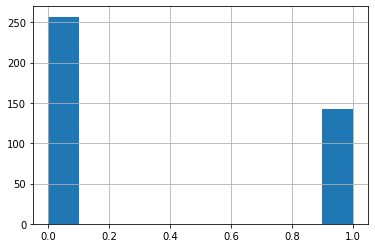

In [91]:
%matplotlib inline
df.Purchased.hist()

In [63]:
#Use to find any duplicates
df['User ID'].value_counts().head()

15730688    1
15603319    1
15775590    1
15753874    1
15575694    1
Name: User ID, dtype: int64

#### Examine Values By Column

In [64]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
User ID,0,0.0
Gender,0,0.0
Age,0,0.0
EstimatedSalary,0,0.0
Purchased,0,0.0


#### NOTE:
No missing values, no nulls, no duplicates.

## EDA

#### Visualize feature distributions

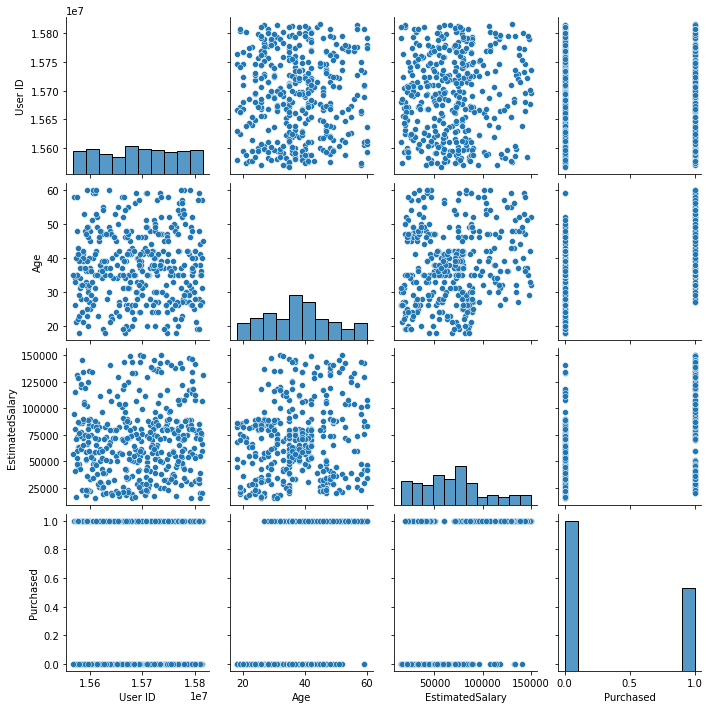

In [93]:
sns.pairplot(df)
# to show
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


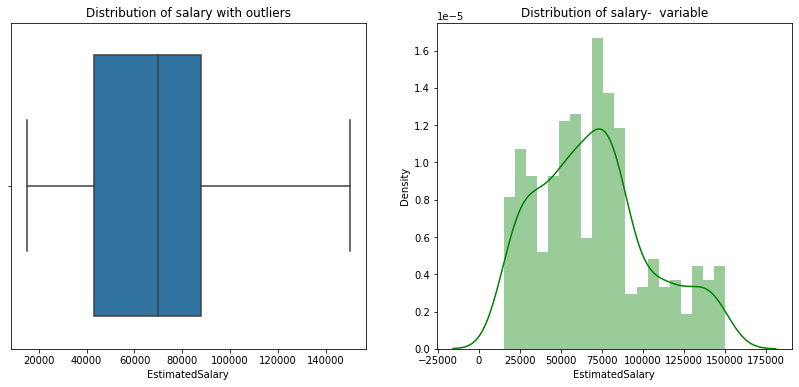

In [76]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df.EstimatedSalary)
plt.title("Distribution of salary with outliers")
plt.subplot(1,2,2)
sns.distplot(df['EstimatedSalary'], bins=20, color = "Green")
plt.title("Distribution of salary-  variable")
plt.show()

#### NOTE:
There are no outliers with a somewhat distributed variable

### Exploring relationship between the feature variables and the target

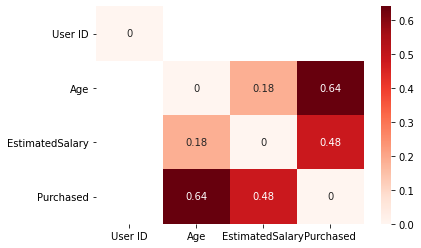

In [107]:
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

#### NOTE: Extracted Independent variable

In [73]:
X = df.iloc[:, [2,3]].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


#### NOTE: Extracted dependent variable (target)

In [74]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Feature Engineering

In [ ]:
Load Machine Learning Libraries¶
Apply the following 4 ML models

* Logistics Regression
* Decision Tree
* Random Forrest
* KNN

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Split the X and y into 75/25 training and testing data subsets

In [89]:
#train test split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

#### Feature Scaling For Standardization

In [94]:
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### NOTE: 
Using Scaling to improve model performance

### Fitting for Logistic Regression

In [96]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Predicting Test results

In [97]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

### Visualizing Training test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


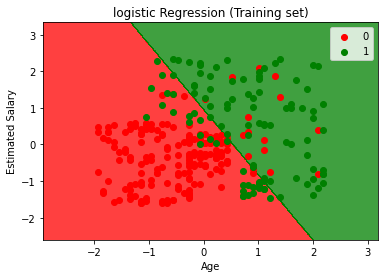

In [108]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### NOTE:
There are a few mis-classifications with internet purchases.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


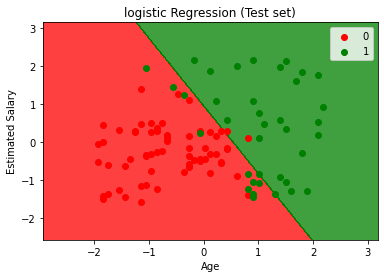

In [109]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Confusion Matrix Evaluation

In [111]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[61,  2],
       [12, 25]], dtype=int64)

#### NOTE: Confusion Matrix Break down

N = 100

TN & FN is the Predicted NO

FP & TP is the Predicted YES

Accuracy:
    (TN+TP)/N
    (61 + 25)/100 = 86%
    
Misclassification Rate:
    (FP +FN)/N
    (2 + 12)/100 = 14%

### Training a Random Forrest

In [113]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
rfc_pred = rfc.predict(X_test)

In [117]:
print(confusion_matrix(y_test, rfc_pred))

[[57  6]
 [ 4 33]]


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.85      0.89      0.87        37

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100



#### NOTE: Confusion Matrix Break down

N = 100

TN & FN is the Predicted NO

FP & TP is the Predicted YES

Accuracy:
    (TN+TP)/N
    (57 + 33)/100 = 90%
    
Misclassification Rate:
    (FP +FN)/N
    (6 + 4)/100 = 10%

### Training a Decision Tree

In [120]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [121]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [122]:
print(confusion_matrix(y_test, dtree_pred))

[[56  7]
 [ 9 28]]


In [123]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



#### NOTE: Confusion Matrix Break down

N = 100

TN & FN is the Predicted NO

FP & TP is the Predicted YES

Accuracy:
    (TN+TP)/N
    (56 + 28)/100 = 84%
    
Misclassification Rate:
    (FP +FN)/N
    (9 + 7)/100 = 16%

### Training a K Nearest Neighbors

In [124]:
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p =2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [126]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [129]:
print(confusion_matrix(y_test, knn_pred))

[[60  3]
 [ 5 32]]


In [130]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.91      0.86      0.89        37

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



#### NOTE: Confusion Matrix Break down

N = 100

TN & FN is the Predicted NO

FP & TP is the Predicted YES

Accuracy:
    (TN+TP)/N
    (60 + 32)/100 = 92%
    
Misclassification Rate:
    (FP +FN)/N
    (5 + 3)/100 = 8%

#### In Conclusion:
        I decided to do different classification techniques to predict internet sales. The purpose was to find the best performers: logistic Regression, Decision Trees, Random Forrest support vectors to get it done. Engineering offered the data in 2 different warehouses, Hadoop and Apache Spark. I worked with the management and Analyst team to understand what information was collected from Google AdWords and Facebook before extracting data. After running several Algothrims, Both Random Forrest and K nearest Neighbor provided an accuracy of 92%.